In [155]:
import json
import sys
sys.path.append("/home/nbuser/library")

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [152]:
data_url = "https://raw.githubusercontent.com/NZMSA/2020-Phase-1/master/Data%20Science%20and%20Machine%20Learning/Dataset%20for%20Assignment.csv"

df = pd.read_csv(data_url, error_bad_lines=False)
deprivation_index = pd.read_excel(r"otago730395.xlsx")
sub_deprivation_index = deprivation_index[["SA12018_code", "NZDep2018"]]

df = pd.merge(df, sub_deprivation_index, left_on="SA1", right_on="SA12018_code")
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,SA12018_code,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,7009770,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,7009991,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,7009991,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,7007871,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,7008902,9.0


In [159]:
def get_census_pop(lon, lat):
    #print("this is lon:", lon, "this is lat:", lat)
    k_url = "https://koordinates.com/services/query/v1/vector.json"

    params = {"key": "3b4a7263c2834cbab3f38677638d24e4", "layer":"104612","x": lon, "y": lat}
    response = requests.get(k_url, params=params)
    
    if response.status_code == 200:
        pop = response.json()["vectorQuery"]["layers"]["104612"]["features"][0]["properties"]["C18_CURPop"]
        #print("this is pop:", pop)
        return pd.Series({"Population": pop})
    
    else:
        return pd.Series({"Population": response.status_code})

#sample = df.head(5)
#sample["Population"] = sample.apply(lambda x: get_census_pop(x["Longitude"], x["Latitude"]), axis=1) 
df["Population"] = df.apply(lambda x: get_census_pop(x["Longitude"], x["Latitude"]), axis=1) 
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,SA12018_code,NZDep2018,Population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,7009770,6.0,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,7009991,1.0,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,7009991,1.0,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,7007871,2.0,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,7008902,9.0,231


In [160]:
df = df.dropna()

In [161]:
df.isnull().values.any()

False

In [162]:
df.describe()

,Bedrooms,Bathrooms,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,SA12018_code,NZDep2018,Population
count,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.00000,1048.000000,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000
mean,3.779580,2.074427,1.388544e+06,-36.894561,174.799026,7.006332e+06,47.544847,28.915076,27.00000,24.131679,22.597328,29.353053,7.006332e+06,5.065840,179.799618
std,1.167894,0.992904,1.184422e+06,0.128426,0.117991,2.583920e+03,24.713408,20.993232,17.93158,10.956798,10.212455,21.810055,2.583920e+03,2.912027,71.087298
min,1.000000,1.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.001130e+06,1.000000,3.000000
25%,3.000000,1.000000,7.800000e+05,-36.950873,174.722226,7.004426e+06,33.000000,15.000000,15.00000,18.000000,15.000000,18.000000,7.004426e+06,2.000000,138.000000
50%,4.000000,2.000000,1.080000e+06,-36.893409,174.798612,7.006334e+06,45.000000,24.000000,24.00000,24.000000,21.000000,27.000000,7.006334e+06,5.000000,174.000000
75%,4.000000,3.000000,1.600000e+06,-36.856280,174.880943,7.008390e+06,57.000000,36.000000,33.00000,30.000000,27.000000,36.000000,7.008390e+06,8.000000,207.750000
max,17.000000,8.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.00000,114.000000,90.000000,483.000000,7.011028e+06,10.000000,789.000000


In [163]:
df.dtypes

Bedrooms          int64
Bathrooms       float64
Address          object
Land area        object
CV                int64
Latitude        float64
Longitude       float64
SA1               int64
0-19 years        int64
20-29 years       int64
30-39 years       int64
40-49 years       int64
50-59 years       int64
60+ years         int64
Suburbs          object
SA12018_code      int64
NZDep2018       float64
Population        int64
dtype: object

In [164]:
df["Bathrooms"].unique()

array([3., 4., 1., 2., 5., 6., 8., 7.])

In [165]:
def remove_m_sqr(area):
    if area[-2] == "m":
        return float(area[:-2])
    else:
        return float(area)
    
df["Land area"] = df["Land area"].apply(remove_m_sqr)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf29839400>,
      dtype=object)

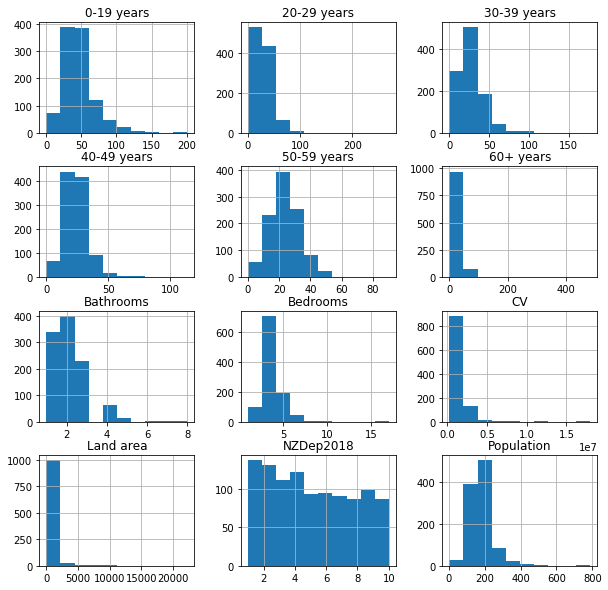

In [167]:
data_to_model = df.drop("Latitude", axis=1)
data_to_model = data_to_model.drop("Longitude", axis=1)
data_to_model = data_to_model.drop("SA1", axis=1)
data_to_model = data_to_model.drop("SA12018_code", axis=1)

#data_to_graph.head()
data_to_model.hist(figsize=(10, 10))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


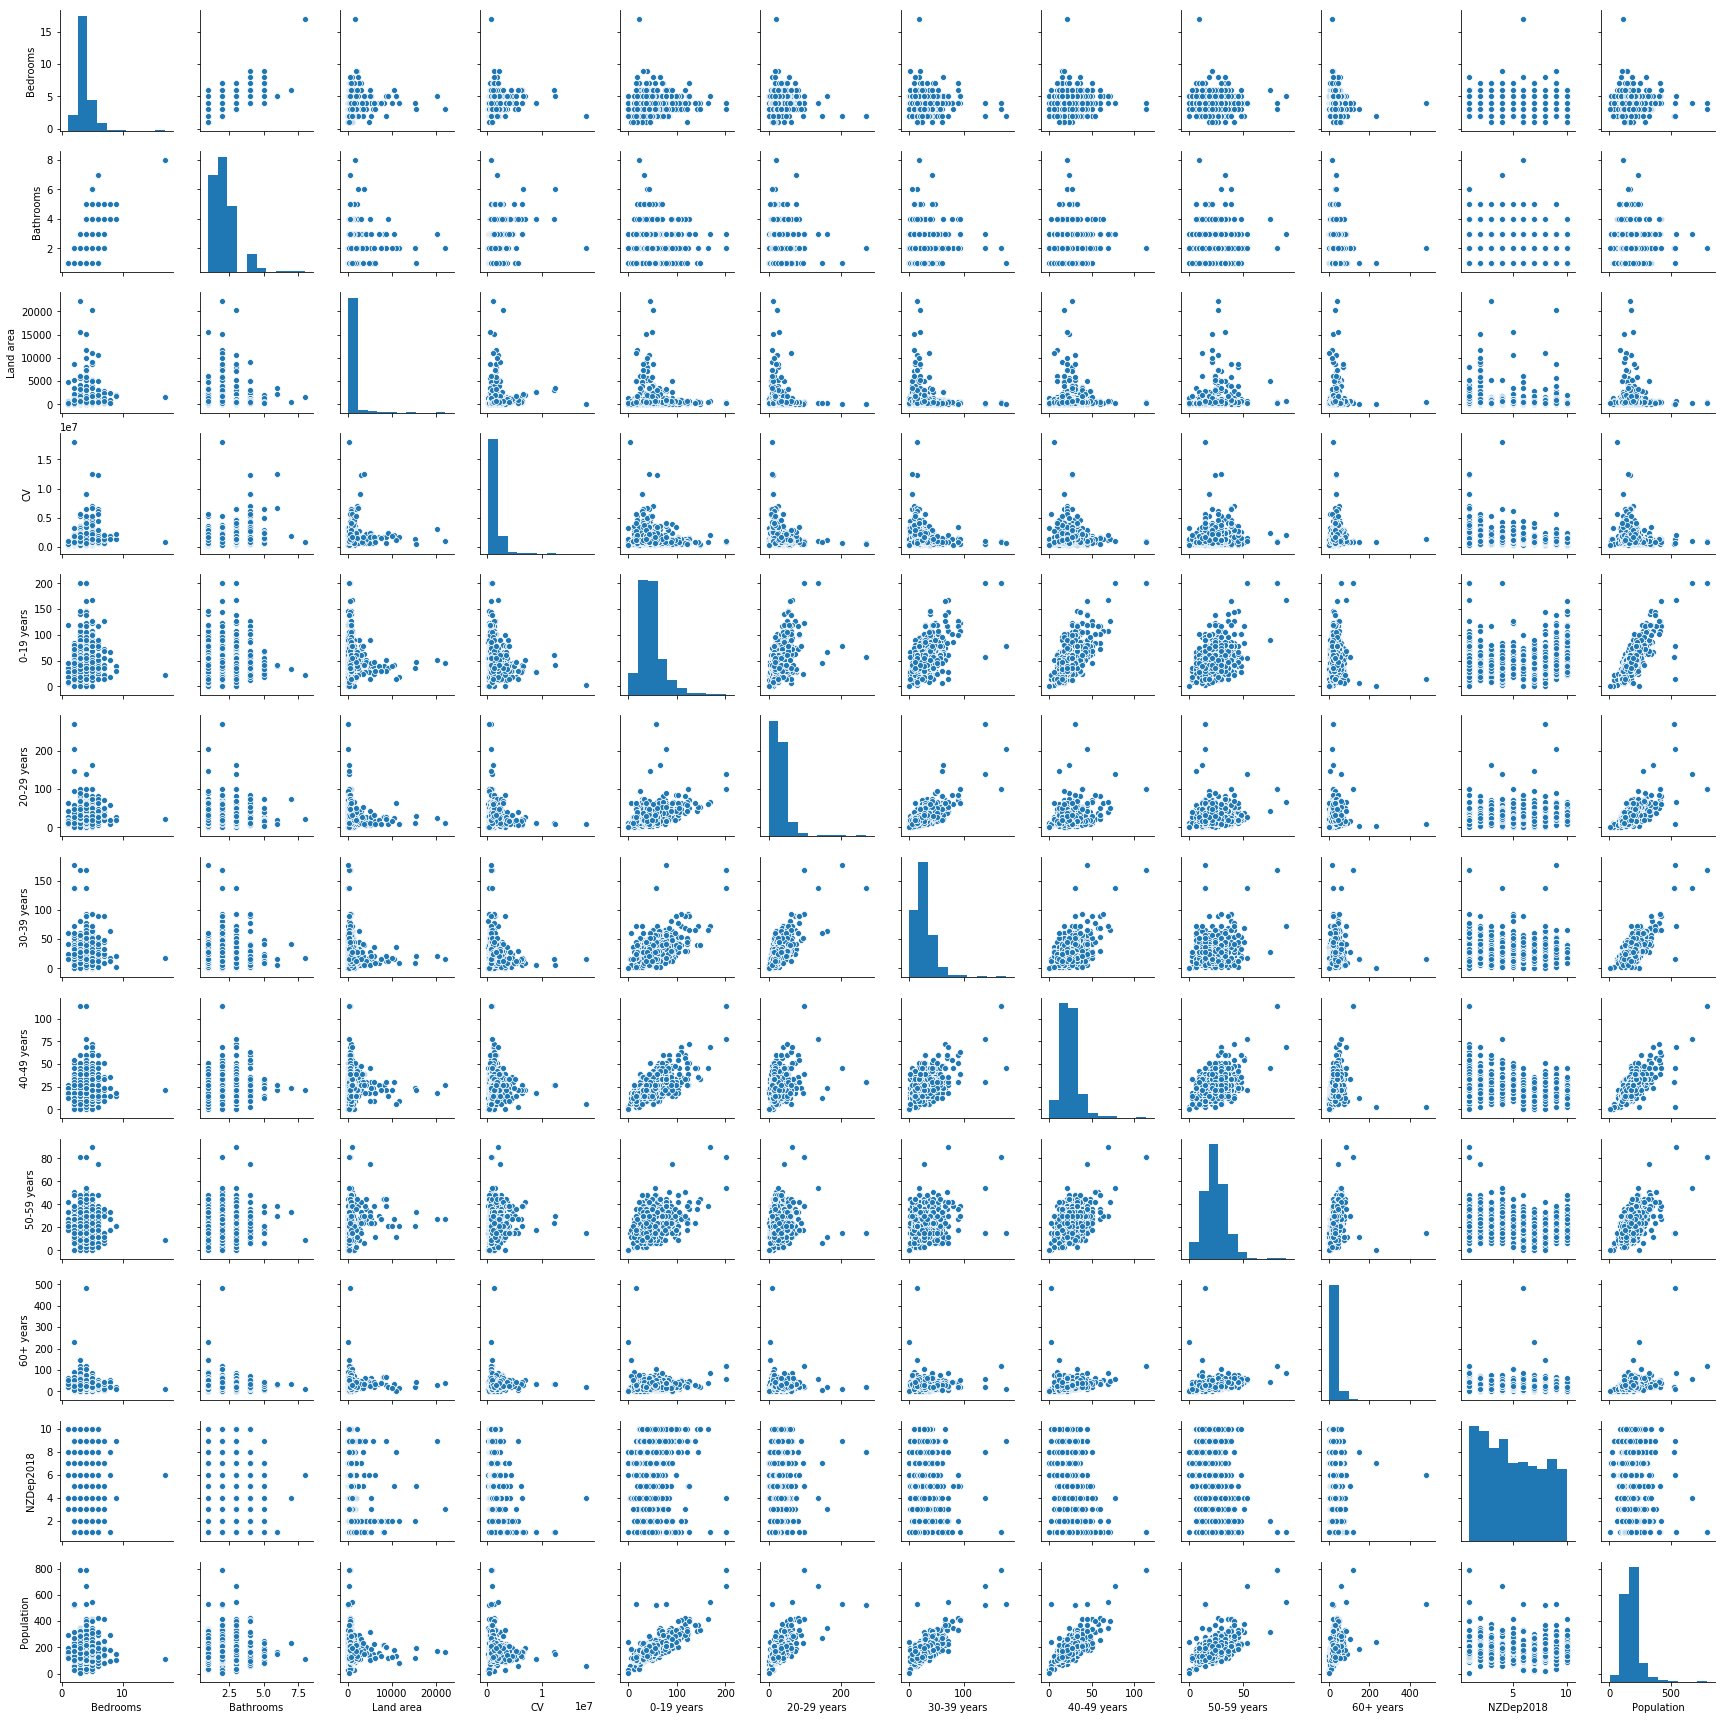

In [168]:
sns.pairplot(data_to_model, size=2.0)

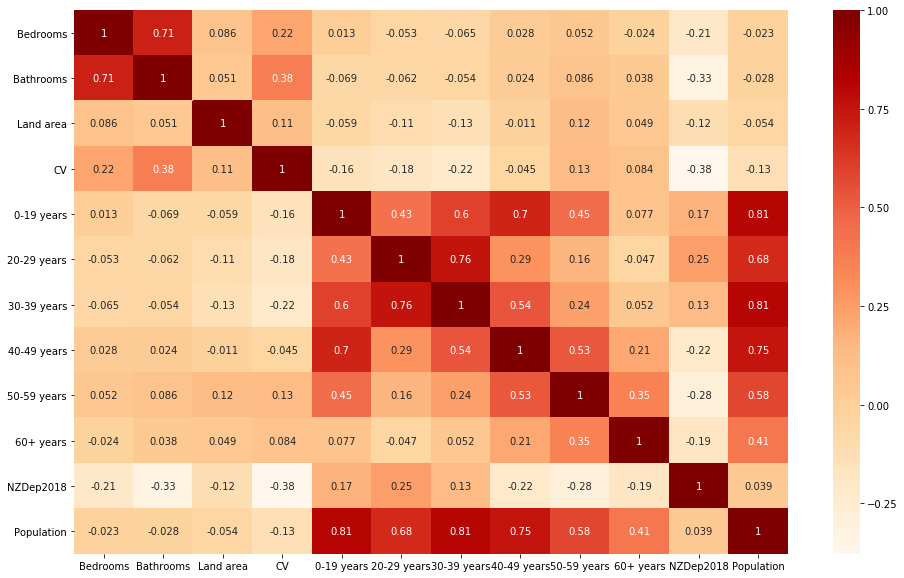

In [169]:
ax, fig = plt.subplots(figsize=(16, 10))
correlation_matrix = data_to_model.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")

In [175]:

data_to_model = data_to_model.drop("Suburbs", axis=1)
x = data_to_model
y = data_to_model["CV"]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [176]:
model.coef_

array([-1.02007694e-10,  8.97048062e-11,  5.19278350e-14,  1.00000000e+00,
       -2.31017985e-12,  7.52686515e-13,  7.15244956e-12,  1.06997502e-11,
        7.54746278e-12,  4.42970070e-12,  6.65668014e-11, -3.02836871e-12])

In [177]:
predicted = model.predict(test_x)

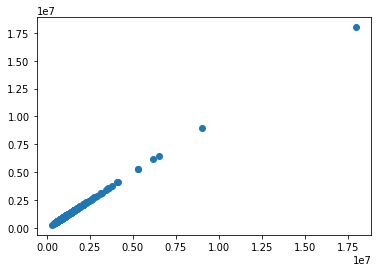

In [178]:
plt.scatter(test_y, predicted)

In [179]:
model.score(test_x, test_y)

1.0